In [2]:
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(0)
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(2)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(24)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(26)

# 5. Configure a new global `tensorflow` session
#from keras import backend as K

from tensorflow.python.keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

import os
import cv2
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os
from keras.models import Sequential, load_model
from tensorflow.keras.models import load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.applications.densenet import DenseNet121 as DenseNet121
from sklearn import preprocessing  #用來標準化刻度

#import matplotlib.pyplot as plt

train_x = [] 
test_x = [] 
test_x_n=[]
train_y = [] 
test_y = [] 

for filename in os.listdir(r'C:\Users\Tony\my_final_report\cxr_control_train_v2_single_selected'):
        #print(filename) #just for test
        #img is used to store the image data 
        img = cv2.imread('cxr_control_train_v2_single_selected' + "/" + filename)
        train_x.append(img)
        train_y.append(0)
        
for filename in os.listdir(r'C:\Users\Tony\my_final_report\cxr_dead_train_multi_selected1'):
        #print(filename) #just for test
        #img is used to store the image data 
        img = cv2.imread('cxr_dead_train_multi_selected1' + "/" + filename)
        train_x.append(img)
        train_y.append(1)

for filename in os.listdir(r'C:\Users\Tony\my_final_report\cxr_control_test_v2_single_selected_new'):
        #print(filename[0:-4]) #just for test
        #img is used to store the image data 
        img = cv2.imread('cxr_control_test_v2_single_selected_new' + "/" + filename)
        test_x.append(img)
        test_x_n.append(img)
        test_y.append(0)

for filename in os.listdir(r'C:\Users\Tony\my_final_report\cxr_dead_test_single_selected'):
        #print(filename[0:-4]) #just for test
        #img is used to store the image data 
        img = cv2.imread('cxr_dead_test_single_selected' + "/" + filename)
        test_x.append(img)
        test_x_n.append(img)
        test_y.append(1)

train_x=np.array(train_x)
test_x=np.array(test_x)
test_x_n=np.array(test_x_n)

train_y=np.array(train_y)
test_y=np.array(test_y)

#train_x = train_x.reshape(7305, 256, 256, 3)
#test_x = test_x.reshape(1502, 256, 256, 3)

train_x=train_x/256
test_x=test_x/256

print(train_x.shape)
#print(train_y.shape)
print(test_x.shape)
#print(test_y.shape)

#train_x_temp=np.concatenate((train_x[:2000], train_x[-1452:]))
#train_y_temp=np.concatenate((train_y[:2000], train_y[-1452:]))

#print(train_x_temp.shape)
#print(train_y_temp.shape)

(10396, 256, 256, 3)
(1612, 256, 256, 3)


In [3]:
from tensorflow.keras import layers, models, preprocessing
from keras.layers import Dense, LSTM, BatchNormalization ,MaxPool2D

class_weight={0:1,1:2}

model = Sequential()
model.add(Conv2D(128, (8, 8), strides=2, input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Conv2D(128, (4, 4), strides=2, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Conv2D(128, (2, 2), strides=2, activation='relu',name='grad'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) #binary_crossentropy categorical_crossentropy

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 128)     24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 128)       262272    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
grad (Conv2D)                (None, 15, 15, 128)       65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 128)       5

In [4]:
#train_history = model.fit(x=train_x_temp, y=train_y_temp, validation_split=0.2, epochs=10, batch_size=32, verbose=2)#,class_weight=class_weight
train_history = model.fit(x=train_x, y=train_y, validation_split=0.2, epochs=7, batch_size=32, verbose=2,class_weight=class_weight)#,class_weight=class_weight


MemoryError: Unable to allocate 6.09 GiB for an array with shape (8316, 256, 256, 3) and data type float32

In [ ]:
neur_test_y_predicted = model.predict(test_x)
predict_test=[]
for i in range(neur_test_y_predicted.shape[0]): 
    if neur_test_y_predicted[i]>0.5:
        predict_test.append(1)
    else:
        predict_test.append(0)
predict_test = np.array(predict_test)

#print(predict_test)

from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,confusion_matrix

cm1 = confusion_matrix(test_y,predict_test)

sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])   #TPR
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])   #FPR

#print('Precision:',precision_score(y_test_1, predict_test))
#print('Recall:', recall_score(y_test_1, predict_test))
#print('f1-score: %f' % f1_score(y_test_1, predict_test))
print('Accuracy: %f' % accuracy_score(test_y, predict_test))
print('Sensitivity : %0.2f' % sensitivity )
print('Specificity :%0.2f' % specificity)

pd.crosstab(test_y,predict_test,rownames=['label'],colnames=['predict'])


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt   # plotting
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(test_y, neur_test_y_predicted) ###計算真正率和假正率
roc_auc = auc(fpr,tpr) ###計算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('eicu_total_new')
plt.legend(loc="lower right")

plt.show()


Exception in thread Control:
Traceback (most recent call last):
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\site-packages\ipykernel\control.py", line 22, in run
    self.io_loop.start()
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\asyncio\base_events.py", line 1750, in _run_once
    event_list = self._selector.select(timeout)
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\selectors.py", line 323, in select
    r, w, _ = self._select(self._readers, self._writers, [], timeout)
  File "C:\Users\Tony\anaconda3\envs\gpu\lib\selectors.py", line 314, in _select
    r, w, x = select.select(r, w, w, timeout)
MemoryError



In [42]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [39]:
image_ca = test_x[-237:]
image_ca_ori=test_x_n[-237:]

In [40]:
predict_test[-32:]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

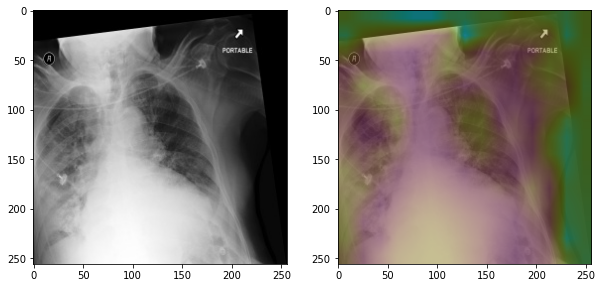

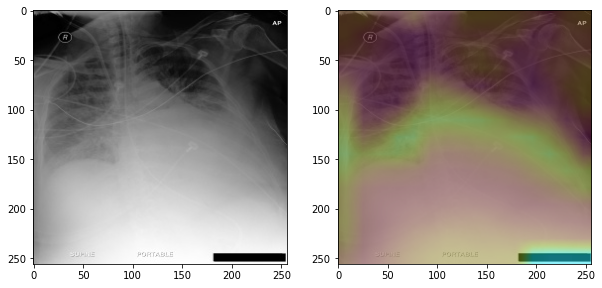

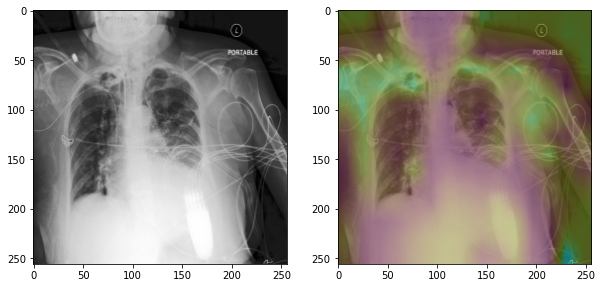

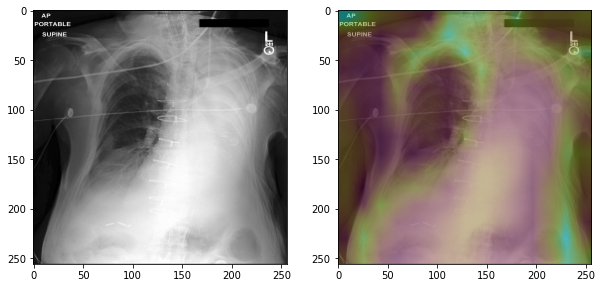

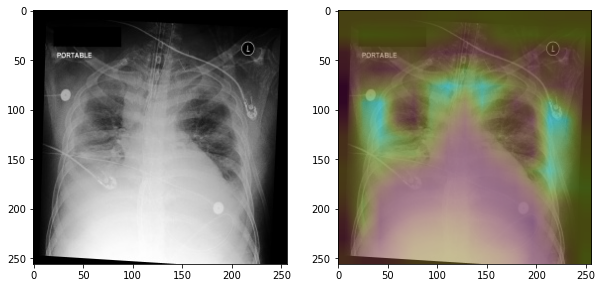

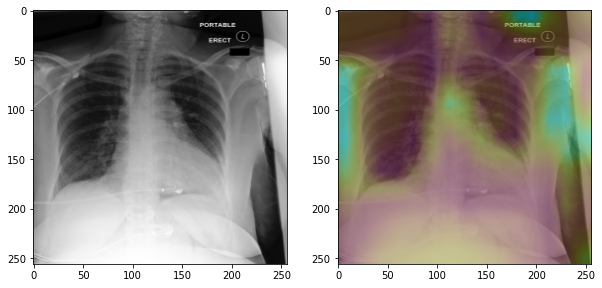

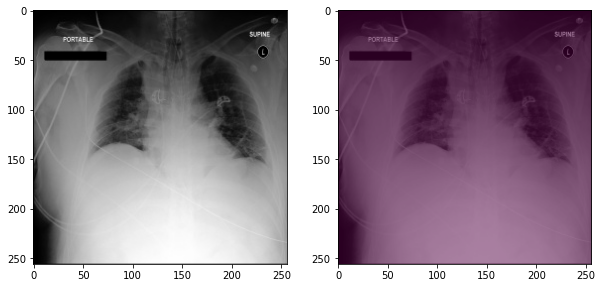

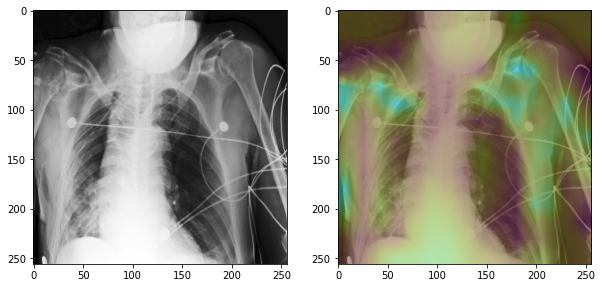

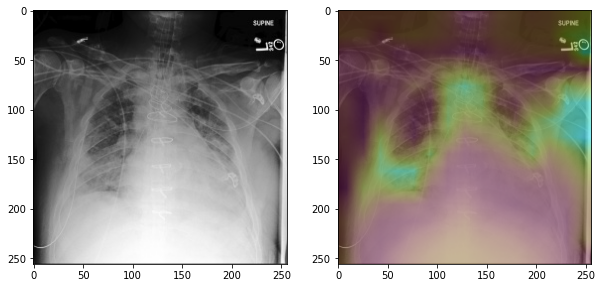

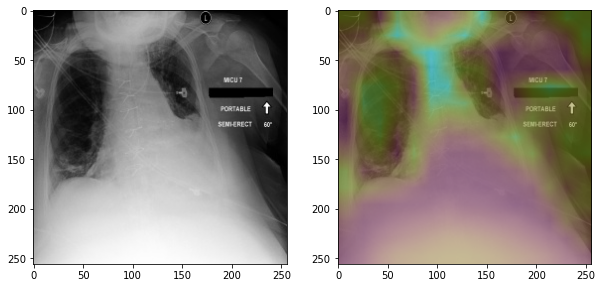

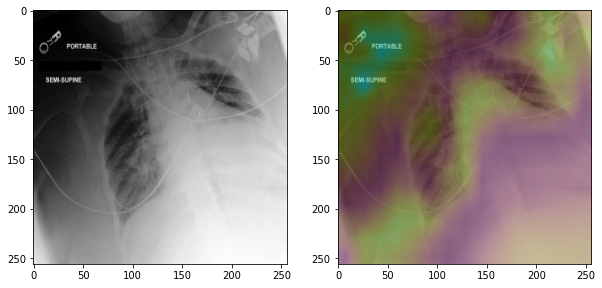

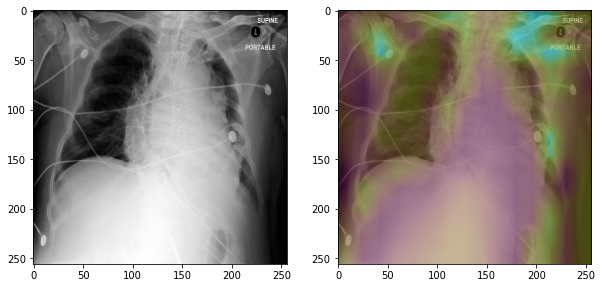

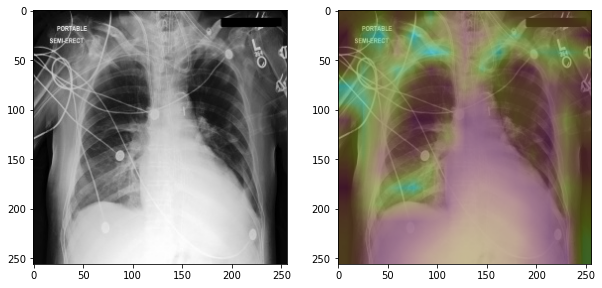

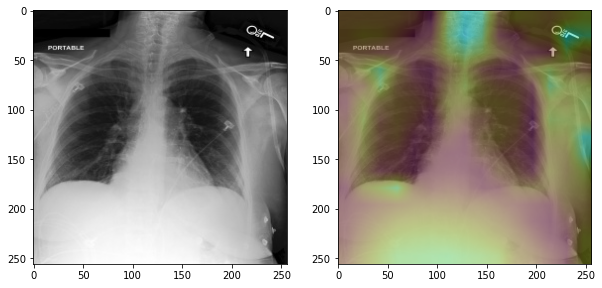

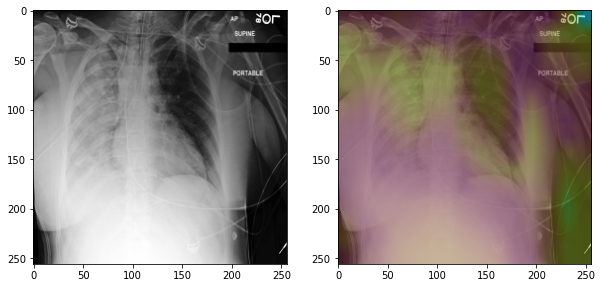

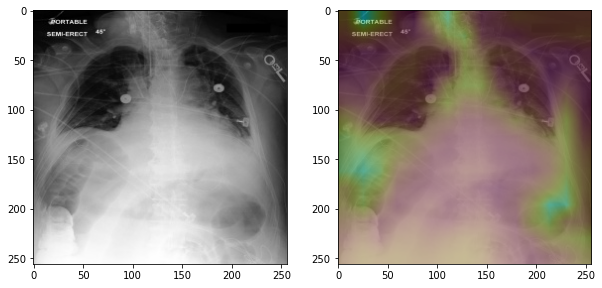

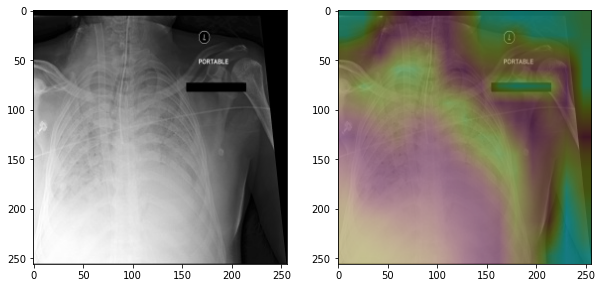

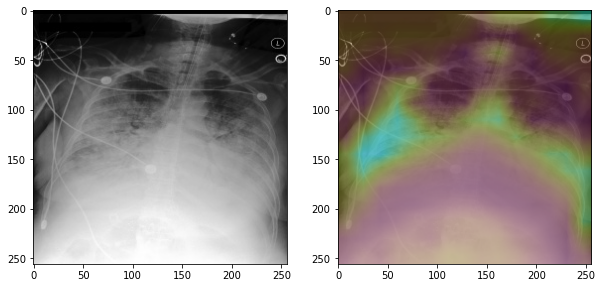

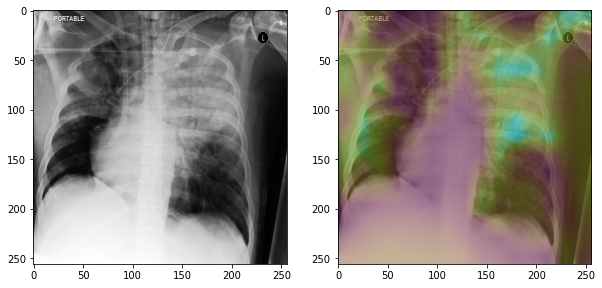

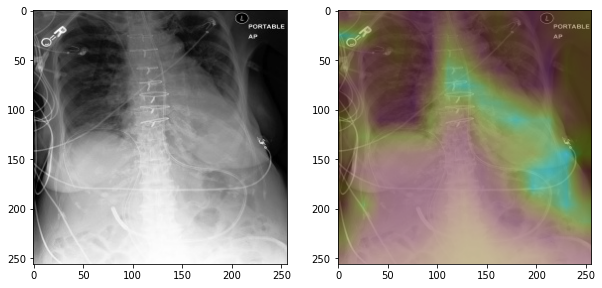

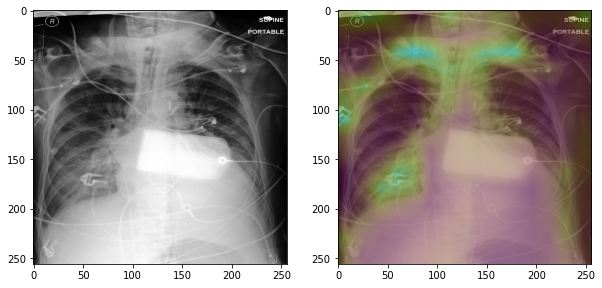

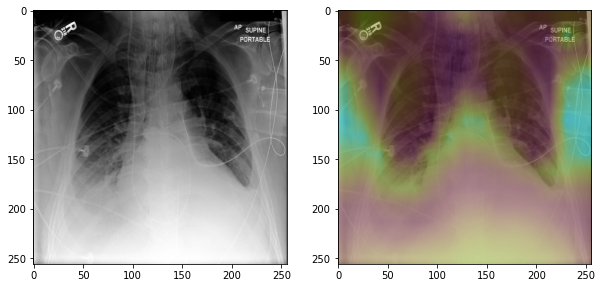

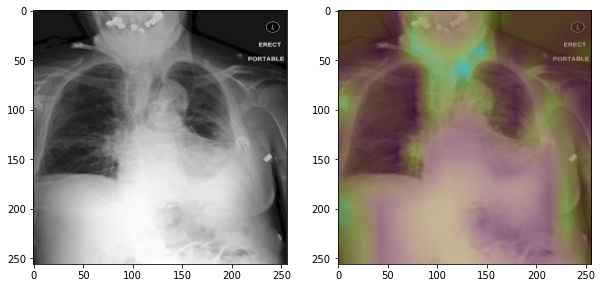

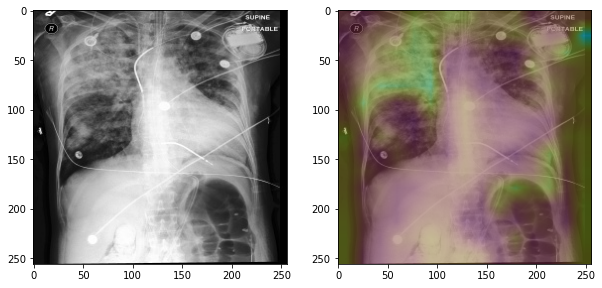

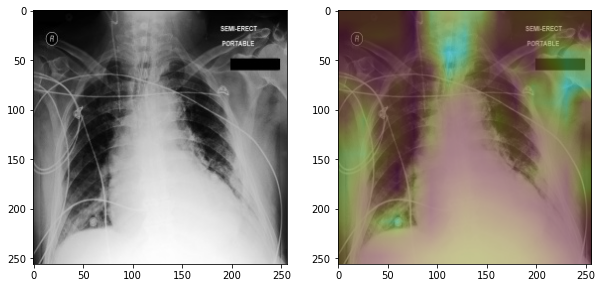

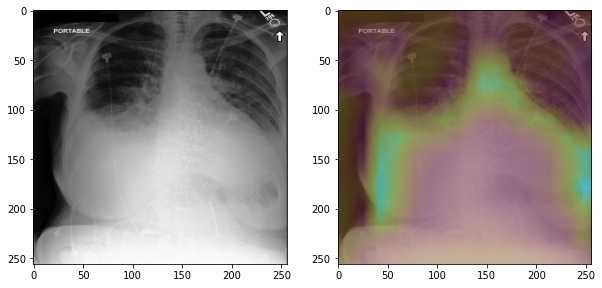

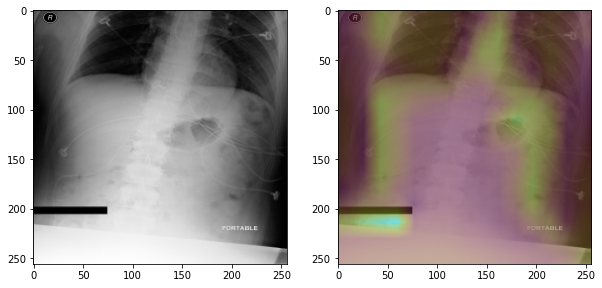

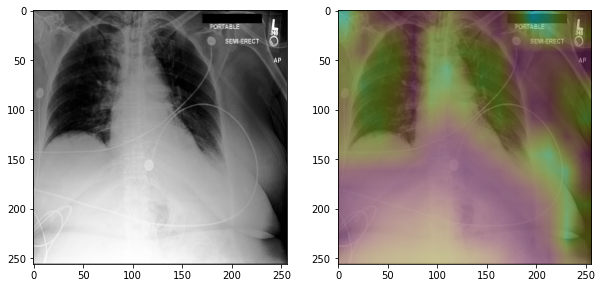

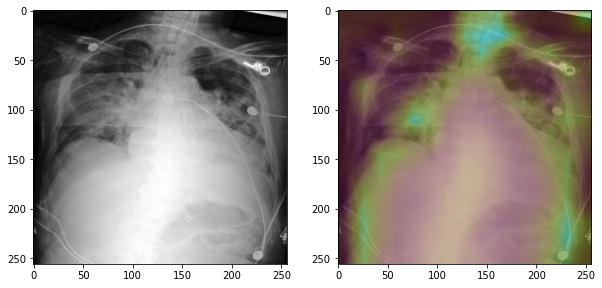

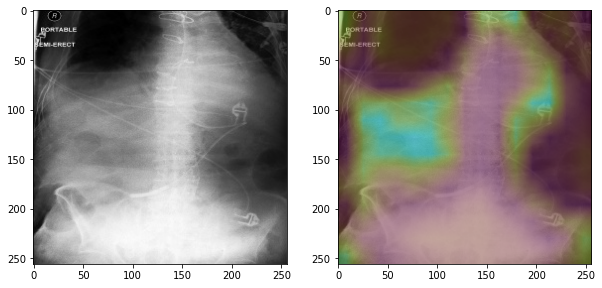

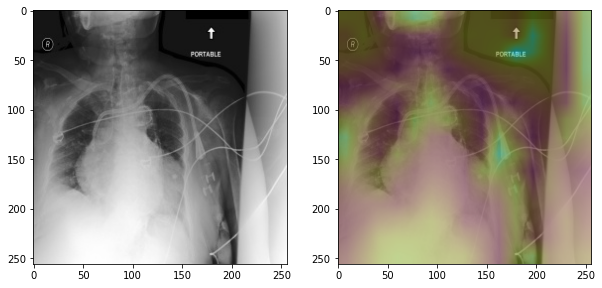

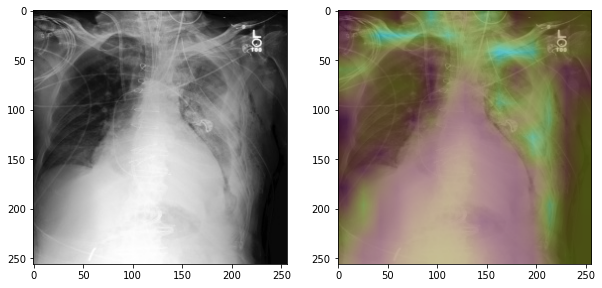

In [52]:
import matplotlib.pyplot as plt
for j in range(237):
    image = image_ca[j]
    image = np.expand_dims(image, axis=0)  #conv2d_2
    image.shape
    preds = model.predict(image) 
    i = np.argmax(preds[0])
    icam = GradCAM(model, i, 'grad') 
    heatmap = icam.compute_heatmap(image)
    #print(heatmap.shape)

    image_ori = image_ca_ori[j]
    image_ori = cv2.resize(image_ori, (256, 256))

    #print(image_ori.shape)

    alpha=0.5
    colormap=cv2.COLORMAP_VIRIDIS
    heatmap_cc = cv2.applyColorMap(heatmap, colormap)
    output = cv2.addWeighted(image_ori, alpha, heatmap_cc, 1 - alpha, 0)

    #print(heatmap_cc.shape)

    #print(output.shape)
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

  # ax[0].imshow(heatmap_cc)
    ax[0].imshow(image_ori)
    ax[1].imshow(output)
    #cv2.imwrite(str(j)+".jpg",plt)  #將圖片儲存為.jpg
    fig.savefig('C:/Users/Tony/my_final_report/dead_grad/'+str(j)+'save_img.jpg', facecolor='grey', edgecolor='red')
    plt.show()
    
    

In [44]:
output.shape

(256, 256, 3)